# Wind arrows coloured by temperature

This is one cell notebook example that will help you plot wind arrows that are coloured by temperature using Magics.

When loading NetCDF file we need to give magics names of the variables that are x and y component of wind and if we want to colour the arrows by some other parameter than speed then we need to specify that parameter too.

One way of showing temperature advection is by colouring wind arrows by temperature. If **wind_advanced_colour_parameter** is set to **"parameter"**, then Magics will use parameter that was given by **mnetcdf** or **mgrib**.

List of all **mwind** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

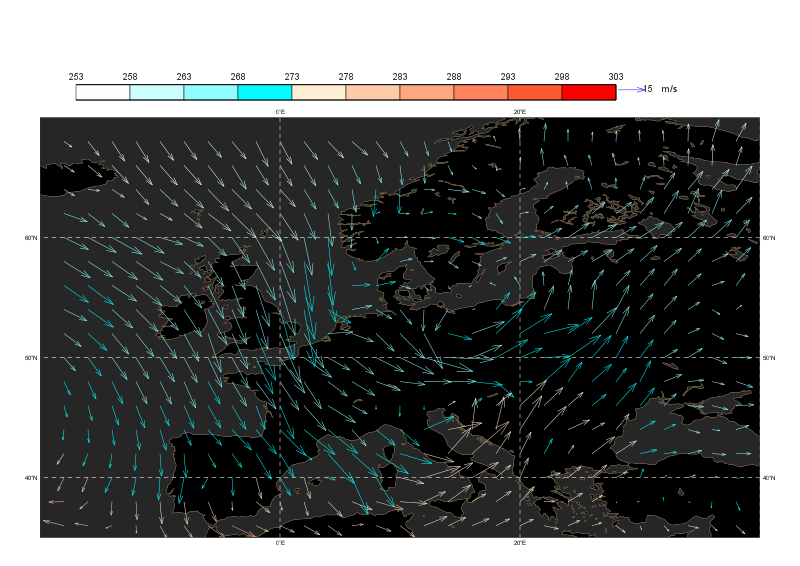

In [1]:
import Magics.macro as magics

# Setting the projection
projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_lower_left_latitude    = 35.,
    subpage_lower_left_longitude   = -20.,
    subpage_map_projection         = 'cylindrical',
    subpage_upper_right_latitude   = 70.,
    subpage_upper_right_longitude  = 40.,
    page_id_line                   = "off"
)

# Defining the coastlines
black_background = magics.mcoast(
    map_coastline_sea_shade         = "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

# Load the NetCDF data
wind_from_nc = magics.mnetcdf(
    netcdf_filename                  = "../../data/coloured_wind.nc",
    netcdf_level_dimension_setting   = "850",
    netcdf_x_component_variable      = "u",
    netcdf_y_component_variable      = "v",
    netcdf_colour_component_variable = "t",
    netcdf_time_dimension_setting    = "2017-01-13 12:00:00"
    )

# Defining Wind plotting
my_wind = magics.mwind(
    wind_field_type                          = "arrows",
    wind_arrow_unit_velocity                 = 15,
    legend                                   = "on",
    wind_advanced_method                     = "on",
    wind_advanced_colour_parameter           = "parameter",
    wind_advanced_colour_selection_type      = "list",
    wind_advanced_colour_table_colour_method = "list",
    wind_advanced_colour_list                = ['#ffffff','#ceffff','#91ffff','#00ffff','#ffefd5',
                                                '#ffccab','#ffa981','#ff835a','#ff5832','#ff0000'],
    wind_advanced_colour_level_list          = [253.,258.,263.,268.,273.,278.,283.,288.,293.,298.,303.],
    wind_arrow_thickness                     = 1,
    wind_arrow_legend_text                   = "  m/s"
    )

# Setting the legend
legend = magics.mlegend(
    legend_display_type   = "continuous",
    legend_box_mode       = "automatic",
    legend_text_colour    = "charcoal",
    legend_text_font_size = "0.4"
)

magics.plot(projection, black_background, wind_from_nc, my_wind, legend)